<a href="https://colab.research.google.com/github/jveko/deep-learning-case-2/blob/main/Deep_Learning_Case_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('iris_data.csv')
df = pd.DataFrame(dataset)

In [ ]:
len(df)

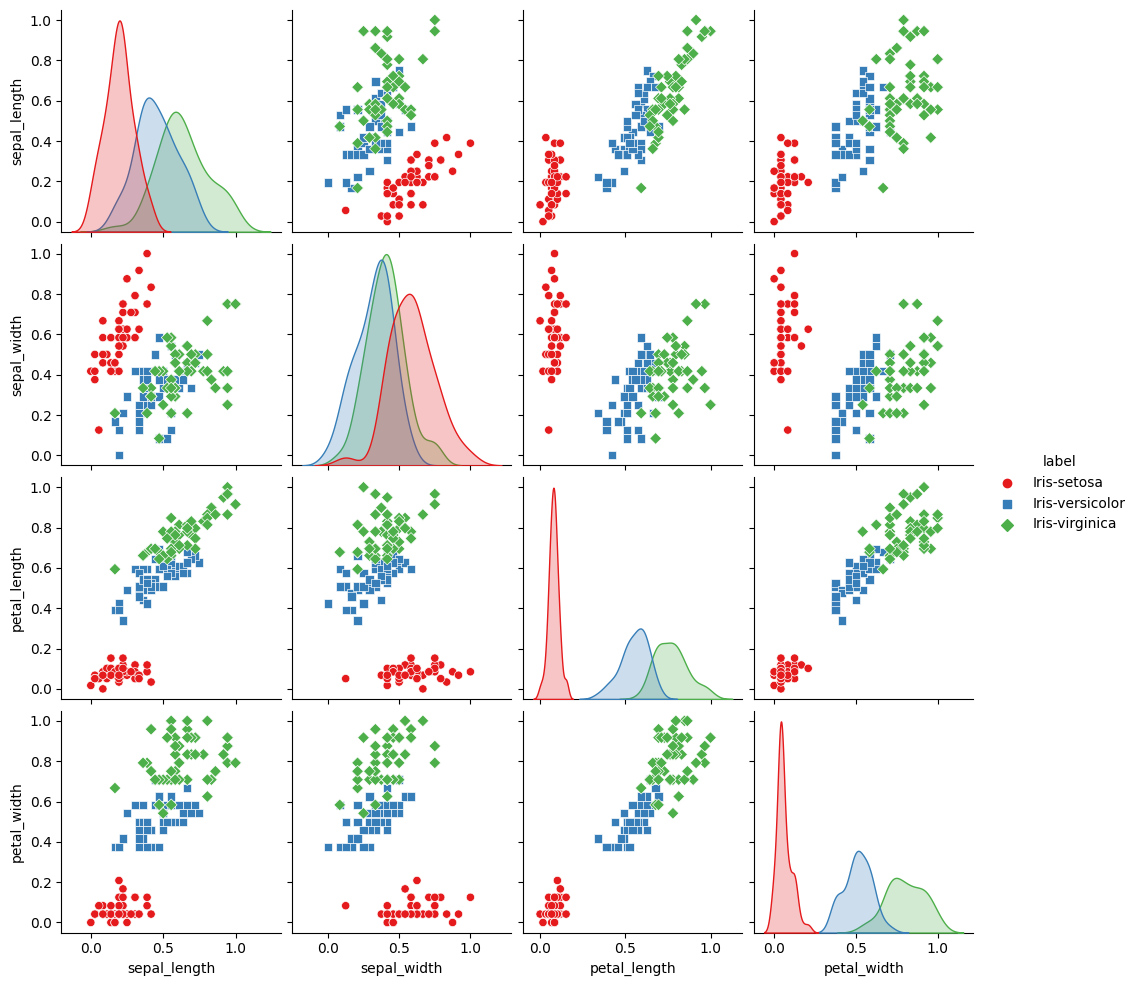

In [3]:
from sklearn.preprocessing import MinMaxScaler

# Separate the features and labels
features = df.drop(columns=['label'])
labels = df['label']

# Initialize the Min-Max scaler
scaler = MinMaxScaler()

# Fit and transform the features
normalized_features = scaler.fit_transform(features)

# Create a DataFrame with the normalized features
data = pd.DataFrame(normalized_features, columns=features.columns)

# Add the 'label' column back to the normalized data
data['label'] = labels

# Create the pairplot with normalized data
sns.pairplot(data, hue='label', markers=['o', 's', 'D'], palette='Set1')

# Display the plot
plt.show()

# Models

In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import keras

X = data.drop("label", axis=1)
y = data["label"]


# Encode the labels using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Convert labels to one-hot encoded vectors
y = keras.utils.to_categorical(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

NameError: ignored

## Softmax Regression Model

In [17]:
from sklearn.preprocessing import StandardScaler

# Normalize the input features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Create a Softmax Regression model using Keras
model = keras.models.Sequential([
    keras.layers.Dense(units=3, activation='softmax', input_shape=(X_train.shape[1],))
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=250, batch_size=8, verbose=0, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Plot the training history (loss and accuracy)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.title('Accuracy and Validation Loss')
plt.show()

ValueError: ignored

## ANN Model

1/1 [==============================] - 0s 39ms/step - loss: 0.0532 - accuracy: 0.9667
Test Loss: 0.0531717911362648
Test Accuracy: 0.9666666388511658


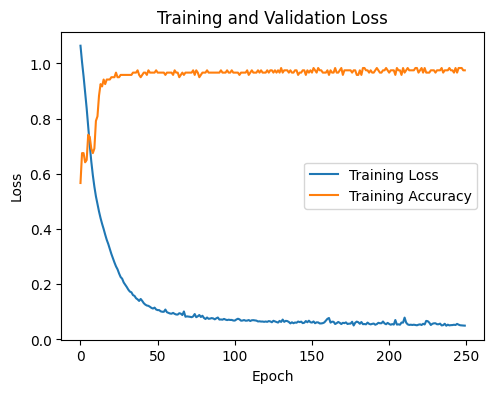

In [ ]:
# Build the neural network model
model = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(3, activation='softmax')  # Output layer for 3 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=250, batch_size=8, verbose=0, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Plot the training history (loss and accuracy)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.title('Accuracy and Validation Loss')
plt.show()